In [2]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import time

In [3]:
y=pd.read_csv('allstate_labels_2007.csv',low_memory=False)
y=y['loan_status']
X=pd.read_csv('allstate_filtered_loans_2007.csv',low_memory=False)

In [4]:
X,y=shuffle(X,y,random_state=0)
X_train_origin,X_test,y_train_origin,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train=X_train_origin
y_train=y_train_origin

In [28]:
smt = SMOTETomek(1)
X_train,y_train = smt.fit_resample(X_train_origin, y_train_origin)

In [29]:
train_size=list(range(1,3))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
FP_train=[]
FP_test=[]
train_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    model=svm.SVC(kernel='linear')
    model.fit(X_train_sub,y_train_sub)
    y_train_pred=model.predict(X_train_sub)
    y_test_pred=model.predict(X_test)
    errorate_train.append(1-accuracy_score(y_train_sub,y_train_pred))
    errorate_test.append(1-accuracy_score(y_test,y_test_pred))
    error_train=y_train_pred-y_train_sub
    FP_train.append(Counter(error_train)[1]/Counter(y_train_sub)[0])
    error_test=y_test_pred-y_test
    FP_test.append(Counter(error_test)[1]/Counter(y_test)[0])
    train_time.append(time.clock()-time_start)

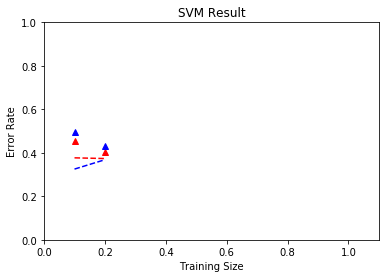

In [34]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--',train_size,FP_train, 'r^', train_size,FP_test, 'b^')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('SVM Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_SVM_Error.png')

In [31]:
FP_test

[0.49494020239190434, 0.43054277828886844]

In [32]:
FP_train

[0.4543987086359968, 0.4037168841439304]

In [33]:
train_time

[1034.0761539537343, 11267.308286722706]

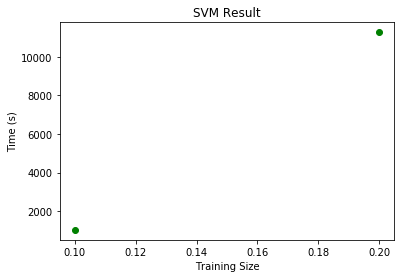

In [36]:
plt.plot(train_size,train_time,'go')
plt.axis([0,1,0,1])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('SVM Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_SVM_T.png')

In [5]:
from imblearn.under_sampling import RandomUnderSampler
res=RandomUnderSampler()
X_res,y_res=res.fit_resample(X_train_origin, y_train_origin)

In [6]:
    time_start=time.clock()
    model=svm.SVC(kernel='linear')
    model.fit(X_res,y_res)
    y_train_pred=model.predict(X_res)
    y_test_pred=model.predict(X_test)
    errorate_train_res=1-accuracy_score(y_res,y_train_pred)
    errorate_test_res=1-accuracy_score(y_test,y_test_pred)
    error_train=y_train_pred-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=y_test_pred-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]
    train_time=time.clock()-time_start

In [7]:
train_time

2423.9342420792223

In [8]:
print(errorate_test_res,FP_test_res,errorate_train_res,FP_train_res)

0.33247089262613194 0.48574057037718493 0.3864160516605166 0.46586715867158673
